## In this project the multiclass classification problem is solved using Iris dataset
#### Two approaches will be applied and compared. Support Vector Machines (SVMs) and Artificial Neural Networks (ANNs)

### Step 1: Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2: Reading the data

In [2]:
iris = pd.read_csv('iris.csv')

### Step 3: Exploring and Cleaning the data

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# How many species do we have?
iris['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [6]:
# Is there any missing data?
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

<AxesSubplot:>

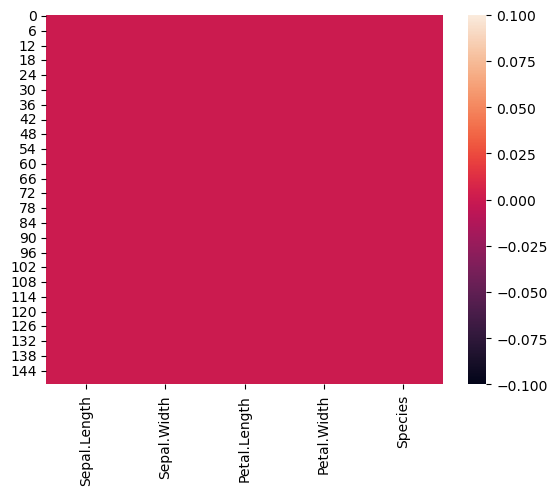

In [7]:
sns.heatmap(iris.isnull())

#### Here I use the LabelEncoder as a step in preprocessing (instead of get_dummies)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE = LabelEncoder()

In [10]:
iris['Species'] = LE.fit_transform(iris['Species'])

In [11]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## Modeling part:
### Model 1: Support Vector Machine (SVM)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = iris.drop('Species',axis=1)
y = iris['Species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()

In [18]:
svc.fit(X_train,y_train)

SVC()

In [19]:
prediction_1 = svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(prediction_1,y_test))
print(confusion_matrix(y_test,prediction_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


### The model works perfect. But we still can improve the model by changing the kernel that is used to increase the dimension of the data

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# In the kernel SVM uses, large "C" means low bias and high variance and large 'gamma' means high bias and low variance 
parameters = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),parameters,verbose=1,cv=10)

In [24]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [25]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [26]:
prediction_2 = grid.predict(X_test)

In [27]:
print(classification_report(prediction_2,y_test))
print(confusion_matrix(y_test,prediction_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


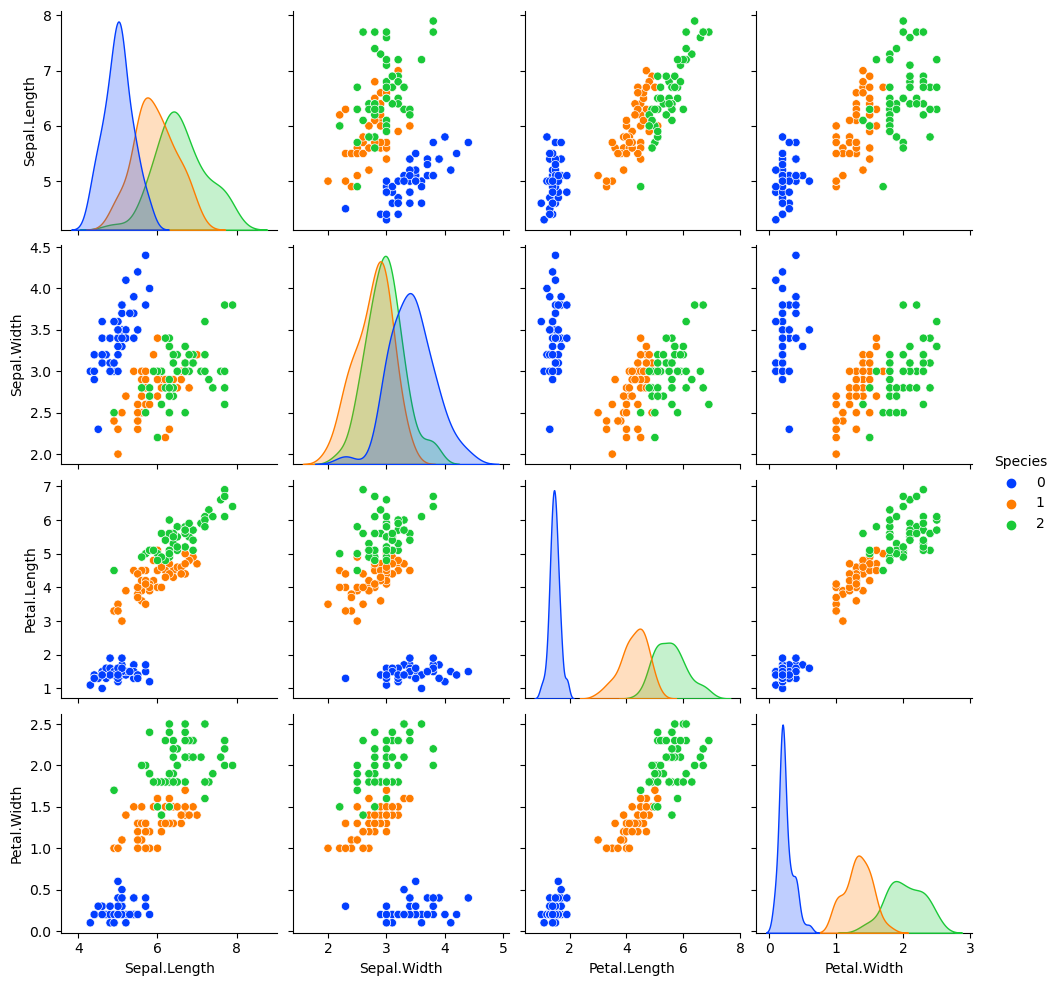

In [30]:
# let's see if we can visualize the performance of the model
# first we take a look at the data set
sns.pairplot(iris,hue='Species', palette = 'bright')

#### I want to check the linearly separable data so I only need to check the performance of our model on the categories 'setosa' and 'versicolor'

In [44]:
# I take off the Verginica data and only focus on Petal Length and Petal Width
df=iris[iris['Species']!=2]
df=df.drop(['Sepal.Length','Sepal.Width'], axis=1)
df.head()

,Petal.Length,Petal.Width,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


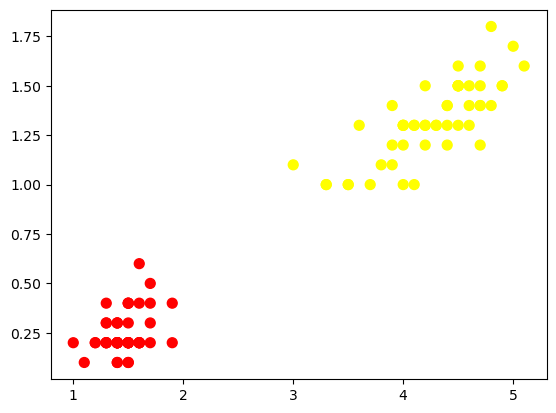

In [45]:
X=df.iloc[:,0:2]
y=df['Species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

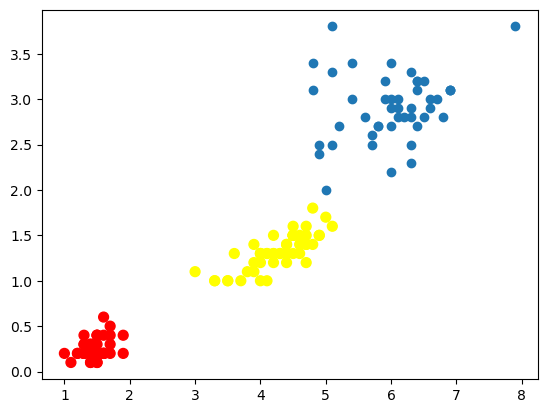

In [49]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

#### It is seen that the support vectors of the model can seperate the data pretty well

### Model 2: Artificial Neural Network (ANN)

In [51]:
from tensorflow.keras.models import Sequential

In [78]:
from tensorflow.keras.layers import Dense, Dropout

In [79]:
from tensorflow.keras.utils import to_categorical

In [80]:
model2 = Sequential()
model2.add(Dense(128,input_shape = (4,), activation = 'relu'))
model2.add(Dense(128, activation= 'relu'))
model2.add(Dense(3, activation= 'softmax'))
# Remember that the number of classes is 3, "input_shape" is a useful command when we want to allocate many perceptrons for the input layer 

In [81]:
model2.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [82]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               640       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [84]:
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [89]:
model2.fit(X_train, y_train, epochs = 100, batch_size = 16, validation_split = 0.2, verbose = 1 )

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 0.1056 - accuracy: 0.9643 - val_loss: 0.2530 - val_accuracy: 0.9048
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9643 - val_loss: 0.3879 - val_accuracy: 0.8571
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0848 - accuracy: 0.9881 - val_loss: 0.2756 - val_accuracy: 0.9048
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0667 - accuracy: 0.9881 - val_loss: 0.4447 - val_accuracy: 0.8095
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0759 - accuracy: 0.9762 - val_loss: 0.4919 - val_accuracy: 0.7619
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.1167 - accuracy: 0.9643 - val_loss: 0.3626 - val_accuracy: 0.9048
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0646 - accuracy: 0.9881 - val_loss: 0.2691 - val_accuracy: 0.8095
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 11ms/step - loss: 0.0644 - accuracy: 0.9762 - val_loss: 0.3093 - val_accuracy: 0.9048
Epoch 60/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0704 - accuracy: 0.9643 - val_loss: 0.2630 - val_accuracy: 0.9048
Epoch 61/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.3760 - val_accuracy: 0.9048
Epoch 62/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0952 - accuracy: 0.9524 - val_loss: 0.3258 - val_accuracy: 0.9048
Epoch 63/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.9762 - val_loss: 0.6239 - val_accuracy: 0.7619
Epoch 64/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0791 - accuracy: 0.9643 - val_loss: 0.4243 - val_accuracy: 0.9048
Epoch 65/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9762 - val_loss: 0.4222 - val_accuracy: 0.9048
Epoch 66/100
6/6 [========

In [90]:
losses = model2.history.history

In [91]:
losses = pd.DataFrame(losses)

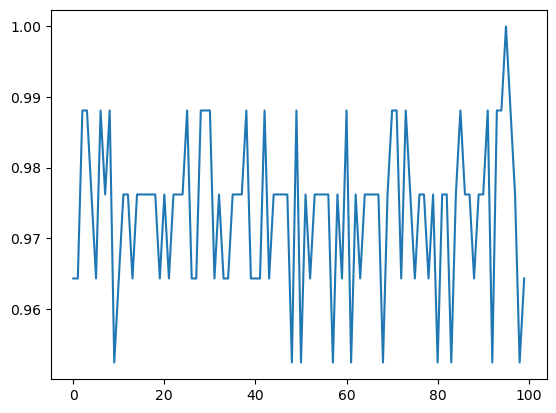

In [100]:
plt.plot(losses['accuracy'])


#### The accuracy is roughly between 0.96 and 0.99 which is very good!

In [139]:
prediction_2 = model2.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [140]:
final_prediction = []
for i,ell in enumerate(prediction_2):
    final_prediction.append(np.argmax(ell))

In [142]:
final_prediction2 = LE.inverse_transform(final_prediction)

In [143]:
final_prediction2

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor'], dtype=object)

In [144]:
X = iris.drop('Species',axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [146]:
print(classification_report(final_prediction,y_test))
print(confusion_matrix(y_test,final_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [147]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

## We see that the Neural Network works PERFECT!

#### I want to test the model with a compeletly new and unseen data point. Let's say we have an iris with following charactristics:
#### Sepal Length = 6.6 mm
#### Sepal Width = 3mm 
#### Petal Length = 4.4mm
#### and Petal Width = 1.4mm

In [156]:
model2_input = [[6.6, 3. , 4.4, 1.4]]
raw_prediction = model2.predict(model2_input)
final_prediction = np.argmax(raw_prediction)
final_prediction2 = LE.inverse_transform([final_prediction])

1/1 [==============================] - 0s 65ms/step


In [157]:
final_prediction2

array(['versicolor'], dtype=object)

### Saving the model

In [162]:
from tensorflow.keras.models import load_model

In [163]:
model2.save("iris_SVC_or_ANN")
    
#Loading a Model 
loaded_model = load_model("iris_SVC_or_ANN")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_SVC_or_ANN\assets


INFO:tensorflow:Assets written to: iris_SVC_or_ANN\assets


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               640       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
